In [4]:
# Импорт библиотек
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Чтение файла
lollipops = pd.read_csv('Леденцы.dat', sep=';')

# Небольшой разведочный анализ
print("Первые 5 строк датафрейма:")
display(lollipops.head())
print(f"\nРазмер датафрейма: {lollipops.shape}")
print("\nОсновная информация:")
lollipops.info()
print("\nОписательная статистика:")
display(lollipops.describe())
print("\nПропущенные значения:", lollipops.isnull().sum(), sep='\n')



Первые 5 строк датафрейма:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3



Размер датафрейма: (338, 11)

Основная информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      338 non-null    int64
 1   V2      338 non-null    int64
 2   V3      338 non-null    int64
 3   V4      338 non-null    int64
 4   V5      338 non-null    int64
 5   V6      338 non-null    int64
 6   V7      338 non-null    int64
 7   V8      338 non-null    int64
 8   V9      338 non-null    int64
 9   V10     338 non-null    int64
 10  V11     338 non-null    int64
dtypes: int64(11)
memory usage: 29.2 KB

Описательная статистика:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,3.544379,3.526627,3.517751,3.411243,3.207101,3.204142,3.254438,3.289941,3.603550,3.550296,3.565089
std,0.955748,0.956410,0.990150,0.992311,0.867314,0.869725,0.844107,0.821784,0.969682,0.927082,0.942042
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,5.000000,5.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000



Пропущенные значения:
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
dtype: int64


In [3]:
# Агломеративный иерархический кластерный анализ
# Стандартизация данных
scaler = StandardScaler()
lollipops_scaled = scaler.fit_transform(lollipops)

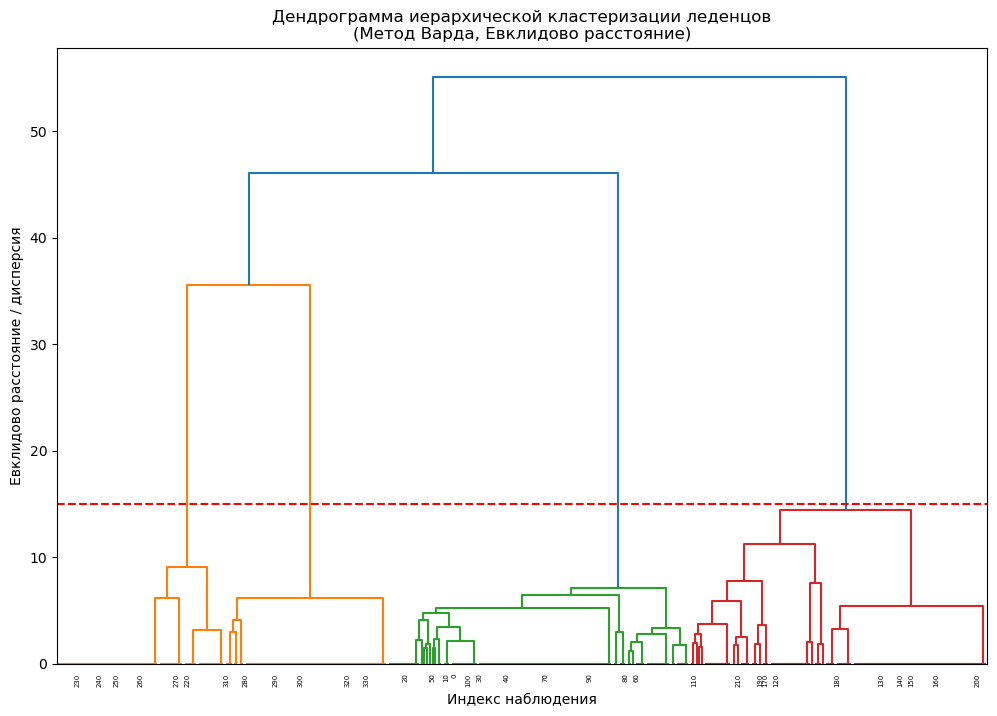

In [13]:
# Построение дендрограммы
# Создание матрицы связей: метод Варда и евклидово расстояние
lollipops_scaled_linked = linkage(lollipops_scaled, method='ward', metric='euclidean')
labels = [str(i) if i % 10 == 0 else '' for i in range(len(lollipops))]

plt.figure(figsize=(12, 8))
dendrogram(lollipops_scaled_linked,
           labels=labels,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Дендрограмма иерархической кластеризации леденцов\n(Метод Варда, Евклидово расстояние)')
plt.xlabel('Индекс наблюдения')
plt.ylabel('Евклидово расстояние / дисперсия')
plt.axhline(y=15, color='r', linestyle='--') # Пример линии для выбора числа кластеров
plt.show()

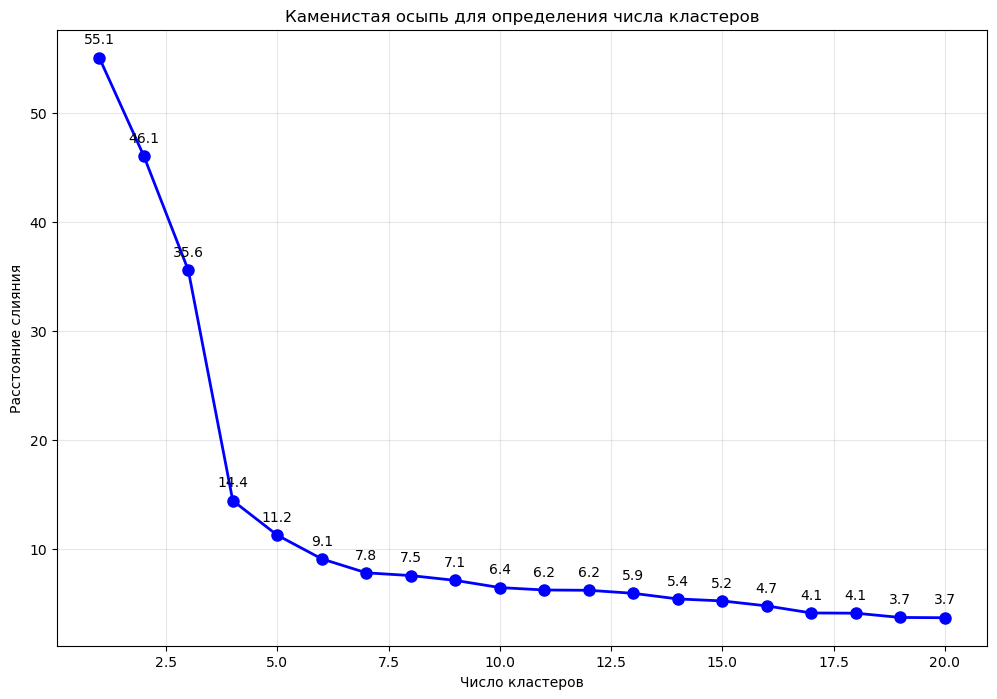

In [17]:
# Строим график каменистая осыпь
# Взяли последние 20 слияний и разворачиваем
last_merges = lollipops_scaled_linked[-20:, 2]
last_merges = last_merges[::-1]

plt.figure(figsize=(12, 8))
plt.plot(range(1, len(last_merges)+1), last_merges, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Число кластеров')
plt.ylabel('Расстояние слияния')
plt.title('Каменистая осыпь для определения числа кластеров')
plt.grid(True, alpha=0.3)

# Добавляем аннотации для удобства
for i, dist in enumerate(last_merges):
    plt.annotate(f'{dist:.1f}', (i+1, dist), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

По графику каменистой осыпи особенно хорошо видно, что число кластеров для данных равно четырём.
Интерпретация результатов:

In [18]:
# Получаем метки для 4 кластеров
labels = fcluster(lollipops_scaled_linked, 4, criterion='maxclust')
lollipops['Cluster'] = labels

# Смотрим распределение по кластерам
print("Размеры кластеров:")
print(lollipops['Cluster'].value_counts().sort_index())

Размеры кластеров:
Cluster
1    108
2    110
3     59
4     61
Name: count, dtype: int64


In [22]:
# Основные статистики по кластерам
cluster_profile = lollipops.groupby('Cluster').agg(['mean', 'std'])
cluster_profile_T = cluster_profile.T
print("Профиль кластеров")
display(cluster_profile_T)



Профиль кластеров


Cluster          1         2         3         4
V1  mean  2.824074  4.845455  3.000000  3.000000
    std   0.382532  0.363125  0.000000  0.000000
V2  mean  2.833333  4.800000  2.966102  3.000000
    std   0.463631  0.401831  0.182521  0.000000
V3  mean  2.768519  4.836364  2.966102  3.000000
    std   0.504308  0.371638  0.182521  0.000000
V4  mean  2.620370  4.681818  2.915254  3.000000
    std   0.558998  0.467902  0.280894  0.000000
V5  mean  2.611111  3.036364  2.915254  4.852459
    std   0.489771  0.188050  0.280894  0.357588
V6  mean  2.583333  3.036364  2.949153  4.852459
    std   0.495305  0.188050  0.221572  0.357588
V7  mean  2.750000  3.000000  4.915254  3.000000
    std   0.565768  0.000000  0.280894  0.000000
V8  mean  2.916667  2.990909  4.915254  2.918033
    std   0.456009  0.253252  0.280894  0.276591
V9  mean  4.953704  3.072727  3.000000  2.754098
    std   0.211106  0.260877  0.000000  0.434194
V10 mean  4.814815  3.045455  3.000000  2.754098
    std   0.390259  0.209252  0.000000  0.434194
V11 mean  4.861111  3.045455  3.000000  2.754098
    std   0.347443  0.209252  0.000000  0.434194

Кластер 1: V9-V11 "Я потребляю леденцы по состоянию здоровья"  
Кластер 2: V1-V4 "Я потребляю леденцы для свежести дыхания и уверенности"   
Кластер 3: V7-V8 "Я потребляю леденцы для концентрации"  
Кластер 4: V5-V6 "Я потребляю леденцы, потому что хочу сладкое"  
